In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Q1: Read The Data From covid.csv And Show Them In A Table

In [2]:
df = pd.read_csv('data\covid.csv')
df

,id,sex,birth_year,country,region,infection_reason,infected_by,confirmed_date,state
0,1,female,1984.0,China,filtered at airport,visit to Wuhan,NaN,1/20/2020,released
1,2,male,1964.0,Korea,filtered at airport,visit to Wuhan,NaN,1/24/2020,released
2,3,male,1966.0,Korea,capital area,visit to Wuhan,NaN,1/26/2020,released
3,4,male,1964.0,Korea,capital area,visit to Wuhan,NaN,1/27/2020,released
4,5,male,1987.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
5,6,male,1964.0,Korea,capital area,contact with patient,3.0,1/30/2020,released
6,7,male,1991.0,Korea,capital area,visit to Wuhan,NaN,1/30/2020,released
7,8,female,1957.0,Korea,Jeollabuk-do,visit to Wuhan,NaN,1/31/2020,released
8,9,female,1992.0,Korea,capital area,contact with patient,5.0,1/31/2020,released
9,10,female,1966.0,Korea,capital area,contact with patient,6.0,1/31/2020,released


Q2: Calculate mean, max, std For birth_year

In [3]:
mean_birth = np.mean(df.birth_year)

max_birth = np.max(df.birth_year)

std_birth = np.std(df.birth_year)

print('Mean: ', mean_birth, ',Max: ', max_birth, ',STD: ', std_birth)

Mean:  1973.3855421686746 ,Max:  2009.0 ,STD:  16.98144368201156


Q3: Handle Null Value Data's

In [4]:
df['birth_year'] = df['birth_year'].fillna(mean_birth)
df = df.dropna(how='any',axis=1)
df

,id,sex,birth_year,country,confirmed_date,state
0,1,female,1984.000000,China,1/20/2020,released
1,2,male,1964.000000,Korea,1/24/2020,released
2,3,male,1966.000000,Korea,1/26/2020,released
3,4,male,1964.000000,Korea,1/27/2020,released
4,5,male,1987.000000,Korea,1/30/2020,released
5,6,male,1964.000000,Korea,1/30/2020,released
6,7,male,1991.000000,Korea,1/30/2020,released
7,8,female,1957.000000,Korea,1/31/2020,released
8,9,female,1992.000000,Korea,1/31/2020,released
9,10,female,1966.000000,Korea,1/31/2020,released


Q4: Visualizing Data's

Scatter Plot

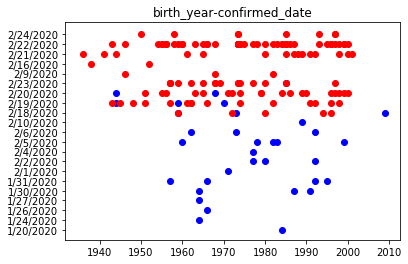

In [5]:
isolated = df.loc[df['state'] == "isolated"]
released = df.loc[df['state'] == "released"]

plt.scatter(released['birth_year'], released['confirmed_date'], color='b')
plt.scatter(isolated['birth_year'], isolated['confirmed_date'], color='r')
plt.title('birth_year-confirmed_date')
plt.savefig('scatter_plot.png')
plt.show()

Matrix Plot

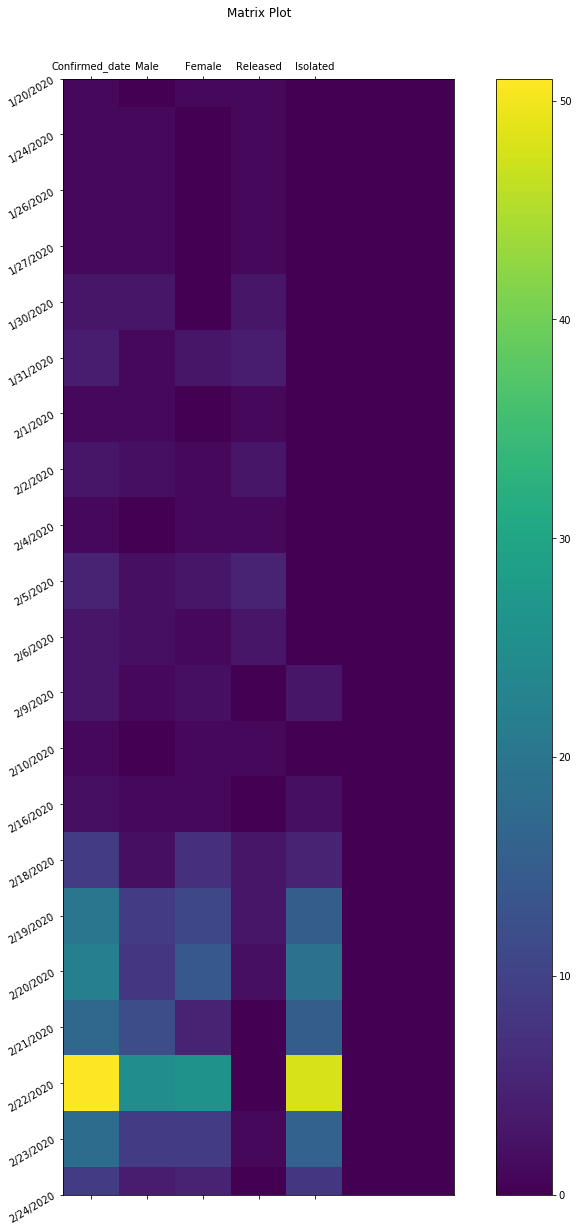

In [6]:
date = pd.unique(df.confirmed_date)
mat = []
for d in date:
    mat.append([
                len(df[(df['confirmed_date'] == d)]),
                len(df[(df['confirmed_date'] == d) & (df['sex']=='male')]),
                len(df[(df['confirmed_date'] == d) & (df['sex']=='female')]),
                len(df[(df['confirmed_date'] == d) & (df['state']=='released')]),
                len(df[(df['confirmed_date'] == d) & (df['state']=='isolated')]),
                len(df[(df['confirmed_date'] == d) & (df['country']=='china')]),
                len(df[(df['confirmed_date'] == d) & (df['country']=='korea')])
                ])
xticks = ['Confirmed_date', 'Male','Female','Released','Isolated', 'China', 'Korea']
plt.figure(figsize=(15,20))
plt.matshow(mat, fignum=1)
plt.colorbar()
plt.xticks(np.arange(5), xticks)
plt.yticks(np.arange(21), date, rotation=30)
plt.title('Matrix Plot')
plt.savefig('Matrix_Plot.png')
plt.show()

Histogram Plot

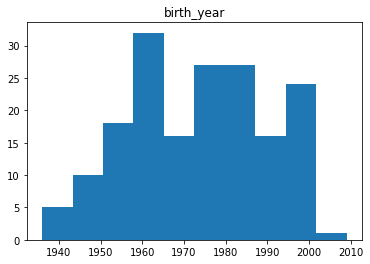

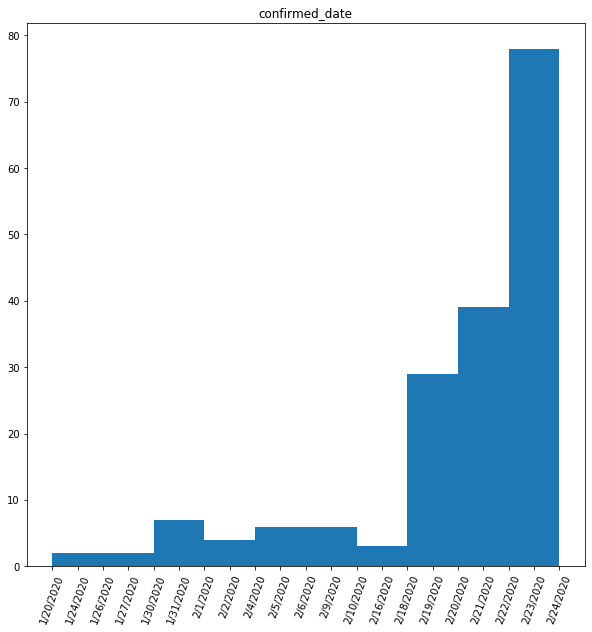

In [7]:
plt.hist(df.birth_year)
plt.title('birth_year')
plt.savefig('hist_birth_year.png')
plt.show()

plt.figure(figsize=(10, 10))
plt.hist(df.confirmed_date)
plt.xticks(rotation=70)
plt.title('confirmed_date')
plt.savefig('hist_confirmed_date.png')
plt.show()